# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: xlabel='Churn', ylabel='count'>

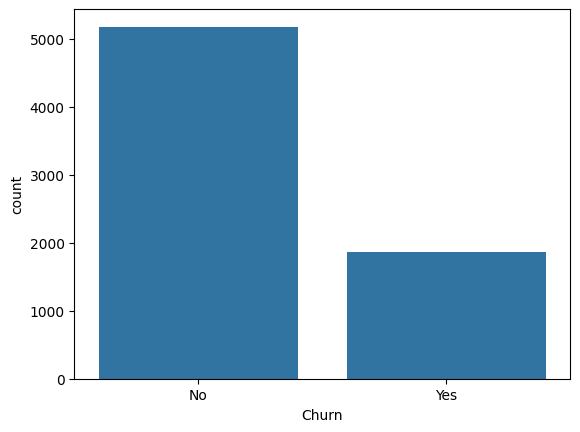

In [ ]:
sns.countplot(x='Churn', data=df)

<Axes: xlabel='Churn', ylabel='count'>

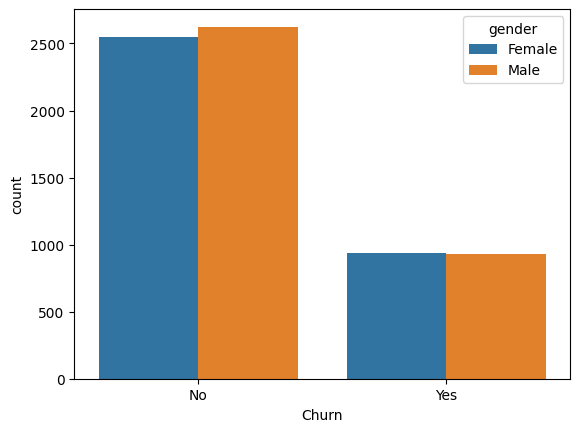

In [ ]:
sns.countplot(x='Churn', hue='gender', data=df)

<Axes: xlabel='Churn', ylabel='count'>

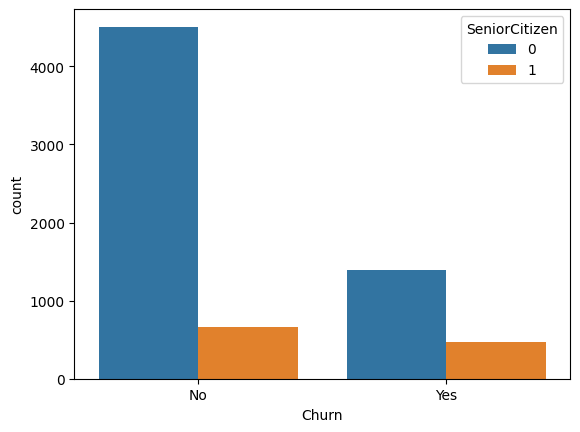

In [ ]:
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)

Senior Citizen are more likely to churn


<Axes: xlabel='Churn', ylabel='count'>

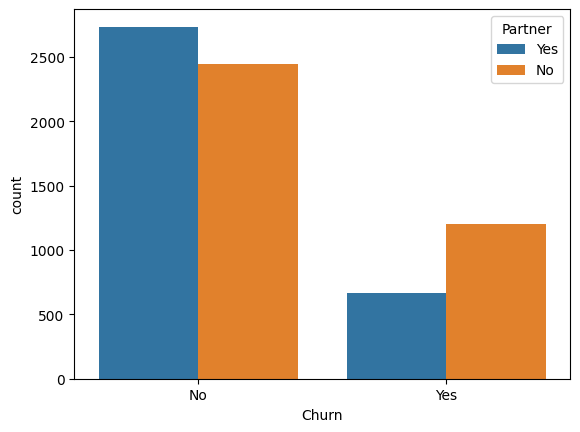

In [ ]:
sns.countplot(x='Churn', hue='Partner', data=df)

People who doesn't have partner or single person are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

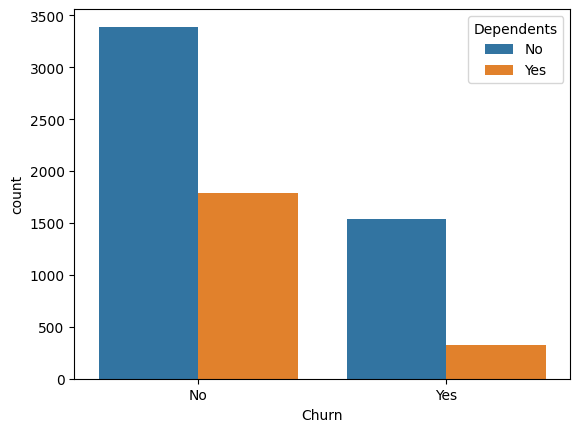

In [ ]:
sns.countplot(x='Churn', hue='Dependents', data=df)

People with no dependents are most likely to churn
If the customer has a family all of them prefer to use same service


<Axes: xlabel='Churn', ylabel='count'>

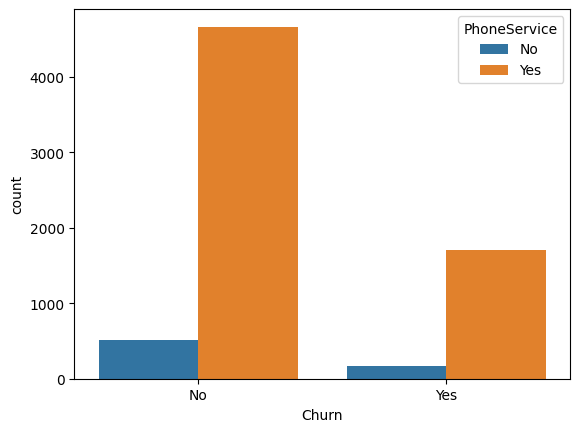

In [ ]:
sns.countplot(x='Churn', hue='PhoneService', data=df)

People who have phone service are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

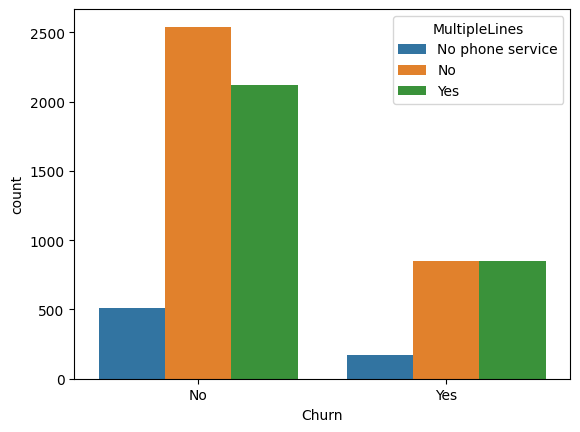

In [ ]:
sns.countplot(x='Churn', hue='MultipleLines', data=df)

<Axes: xlabel='Churn', ylabel='count'>

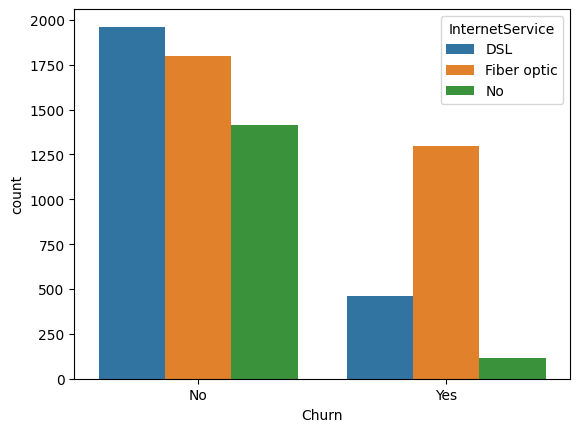

In [ ]:
sns.countplot(x='Churn', hue='InternetService', data=df)


People who have opted for fiber optics are more likely to churn
Those who have DSL service have more retention.

<Axes: xlabel='Churn', ylabel='count'>

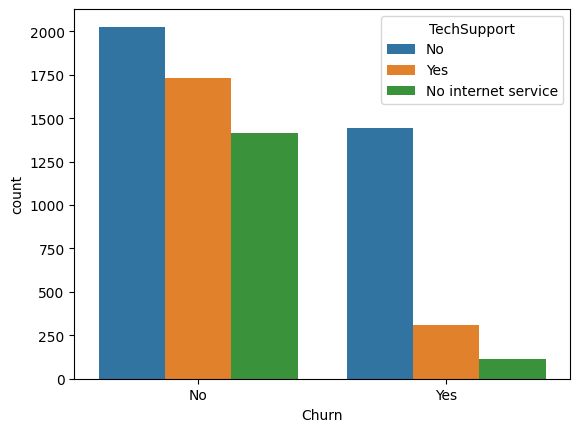

In [ ]:
sns.countplot(x='Churn', hue='TechSupport', data=df)

People with no tech support are more to churn.

<Axes: xlabel='Churn', ylabel='count'>

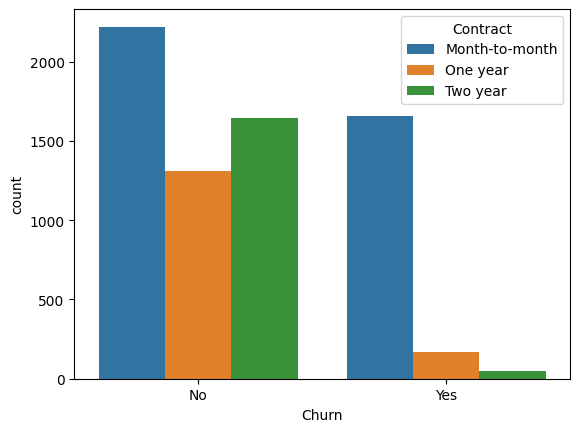

In [ ]:
sns.countplot(x='Churn', hue='Contract', data=df)

People who are on monthly contract are more likely to churn and people on yearly contract are less likely to churn.

<Axes: xlabel='Churn', ylabel='count'>

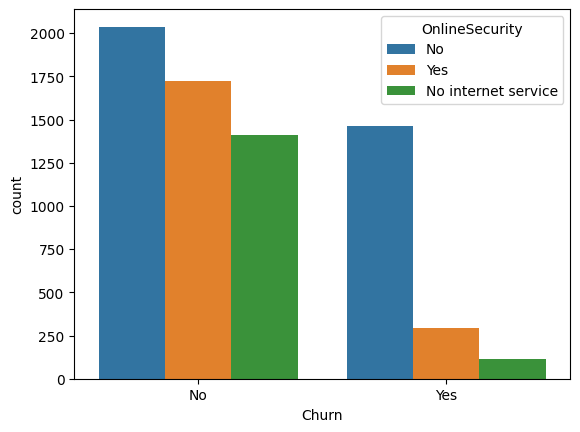

In [ ]:
sns.countplot(x='Churn', hue='OnlineSecurity', data=df)

Those who do not have online security are most to churn.


<Axes: xlabel='Churn', ylabel='count'>

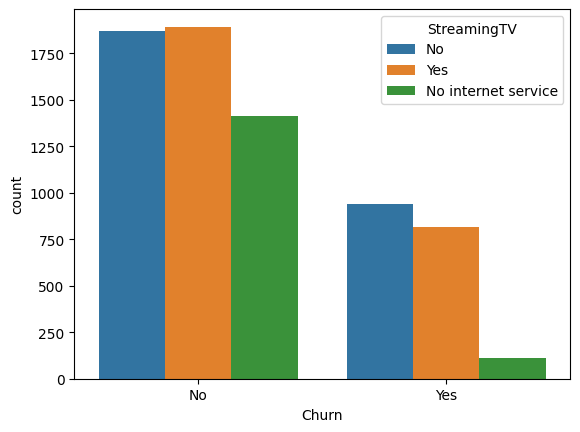

In [ ]:
sns.countplot(x='Churn', hue='StreamingTV', data=df)


<Axes: xlabel='Churn', ylabel='count'>

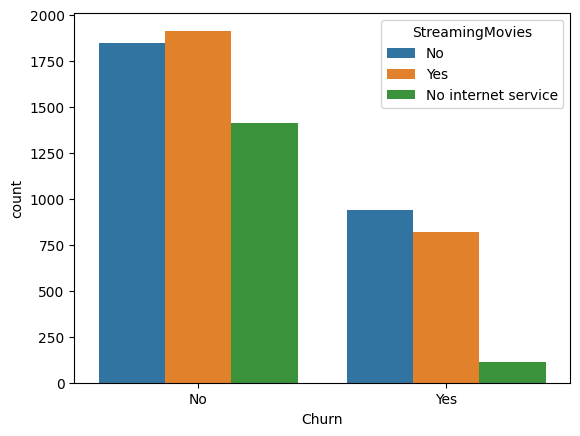

In [ ]:
sns.countplot(x='Churn', hue='StreamingMovies', data=df)

<Axes: xlabel='Churn', ylabel='count'>

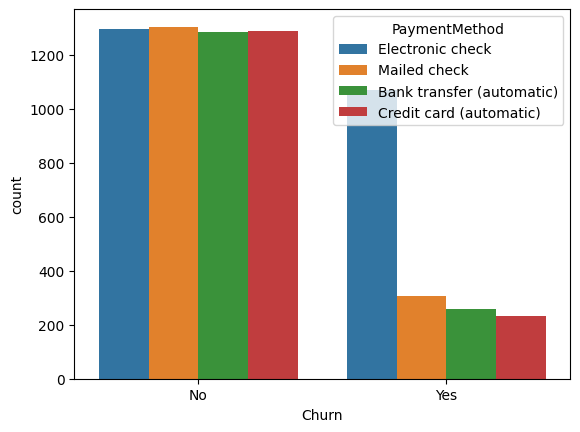

In [ ]:
sns.countplot(x='Churn', hue='PaymentMethod', data=df)

People who have opted for electronic check payment method are more likely to churn.

<Axes: xlabel='Churn', ylabel='tenure'>

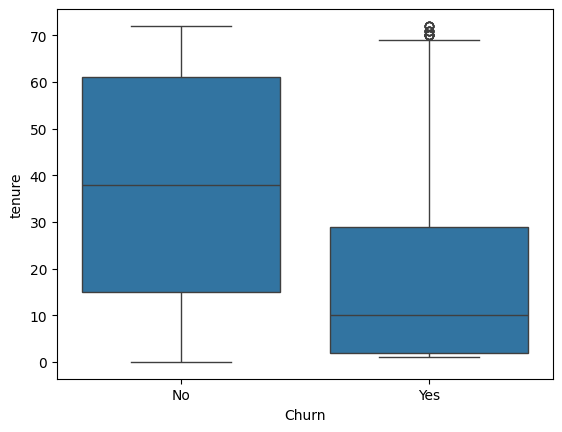

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=df)

In [ ]:
# Define the columns to keep
columns_to_keep = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract', 'TotalCharges', 'Churn']
# Select only the specified columns
df = df[columns_to_keep]


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,Month-to-month,29.85,No
1,Male,0,No,No,34,Yes,No,One year,1889.5,No
2,Male,0,No,No,2,Yes,No,Month-to-month,108.15,Yes
3,Male,0,No,No,45,No,No phone service,One year,1840.75,No
4,Female,0,No,No,2,Yes,No,Month-to-month,151.65,Yes


In [ ]:
#use label encoder
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# List of columns to label encode
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract', 'Churn']
# Apply label encoding to each column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,29.85,0
1,1,0,0,0,34,1,0,1,1889.5,0
2,1,0,0,0,2,1,0,0,108.15,1
3,1,0,0,0,45,0,1,1,1840.75,0
4,0,0,0,0,2,1,0,0,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,1990.5,0
7039,0,0,1,1,72,1,2,1,7362.9,0
7040,0,0,1,1,11,0,1,0,346.45,0
7041,1,1,1,0,4,1,2,0,306.6,1


In [ ]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'Churn']
df[binary_columns] = df[binary_columns].replace({'Yes':1,'No':0})



In [ ]:
df[['MultipleLines','Contract']] = df[['MultipleLines','Contract']].replace({'Yes':1,'No':0,'No phone service':2,"Month-to-month":1,'One year':2,'Two year':3})


In [ ]:
df['gender'] = df['gender'].replace({'Male':1,'Female':0})

# Train and Test Split

In [ ]:
# Split the dataset into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert 'TotalCharges' column to float, and handle errors='coerce' to replace non-numeric values with NaN
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

In [ ]:
# Replace missing values with the mean
X_train = X_train.fillna(X_train.mean(numeric_only=True))
X_test = X_test.fillna(X_train.mean(numeric_only=True))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [ ]:
lg = LogisticRegression()                   #initialize
lg.fit(X_train,y_train)                     #train model
y_pred = lg.predict(X_test)
y_pred
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1036
           1       0.62      0.39      0.48       373

    accuracy                           0.78      1409
   macro avg       0.71      0.65      0.67      1409
weighted avg       0.76      0.78      0.76      1409



# Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7757274662881476

# System Classification

In [ ]:
def prediction(gender,Seniorcitizen,Partner,Dependents,tenure,Phoneservice,multiline,contact,totalcharge):
    data = {
    'gender': [gender],
    'SeniorCitizen': [Dependents],
    'Partner': [Partner],
    'Dependents': [Phoneservice],
    'tenure': [tenure],
    'PhoneService': [Phoneservice],
    'MultipleLines': [multiline],
    'Contract': [contact],
    'TotalCharges': [totalcharge]
    }
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)


    # Encode the categorical columns
    categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract']
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    df = scaler.fit_transform(df)

    result = lg.predict(df).reshape(1,-1)
    return result[0]
gender = "Female"
Seniorcitizen = "No"
Partner = "Yes"
Dependents = "No"
tenure = 1
Phoneservice="No"
multiline = "No phone service"
contact="Month-to-month"
totalcharge = 29.85
result = prediction(gender,Seniorcitizen,Partner,Dependents,tenure,Phoneservice,multiline,contact,totalcharge)

if result==1:
    print('churn')
else:
    print('not churn')

not churn
